In [39]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

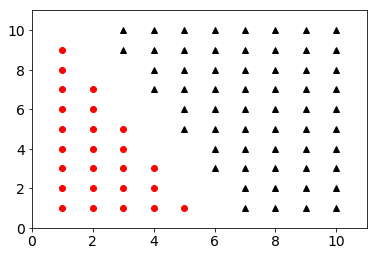

In [40]:
# Load in a 2-d data set. Labels are +1/-1 and each line is a single
# data point, of the form: x1 x2 y
datafile = 'data10.txt'
data = np.loadtxt(datafile)
n,d = data.shape
# Create training set x and labels y
# Append a "1" feature to each data point (to remove the need for an offset)
x = np.ones((n,d))
x[:,0:2] = data[:,0:2]
y = data[:,2]
# Now display the data for good measure
xmin = min(x[:,0]) - 1
xmax = max(x[:,0]) + 1
ymin = min(x[:,1]) - 1
ymax = max(x[:,1]) + 1
plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()

In [52]:
def evaluate(w,x):
    if np.dot(w,x) > 0:
        return 1
    if np.dot(w,x) < 0:
        return -1
    return 0
# Perceptron algorithm, given data set (x,y)
# Assume all data points have an additional feature "1"
def train(x,y):
    n,d = x.shape
    w = np.zeros((d,))
    working = True
    niters = 0
    np.random.seed(None)
    while working:
        working = False
        I = np.random.permutation(n)
        for i in range(n):
            j = I[i]
            if (evaluate(w,x[j,:]) != y[j]):
                working = True
                w = w + y[j] * x[j,:] 
        niters = niters + 1
    return w, niters

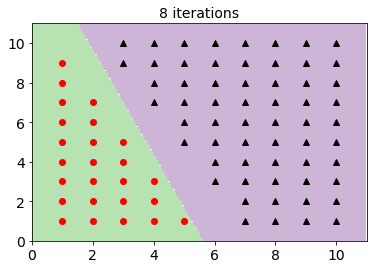

In [57]:
# Train the linear classifier and plot the decision boundary
w, niters = train(x,y)
#
delta = 0.05
xx, yy = np.meshgrid(np.arange(xmin, xmax, delta), np.arange(ymin, ymax, delta))
grid = np.c_[xx.ravel(), yy.ravel()]
gn, gp = grid.shape
Z = np.zeros(gn)
for i in range(gn):
    pt = np.zeros(3)
    pt[0] = grid[i,0]
    pt[1] = grid[i,1]
    pt[2] = 1.0
    Z[i] = evaluate(w, pt)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)

# Plot also the training points
plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
plt.title(str(niters)+ " iterations", fontsize=14)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()